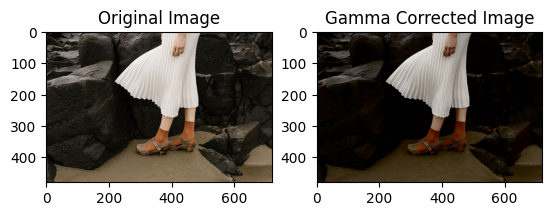

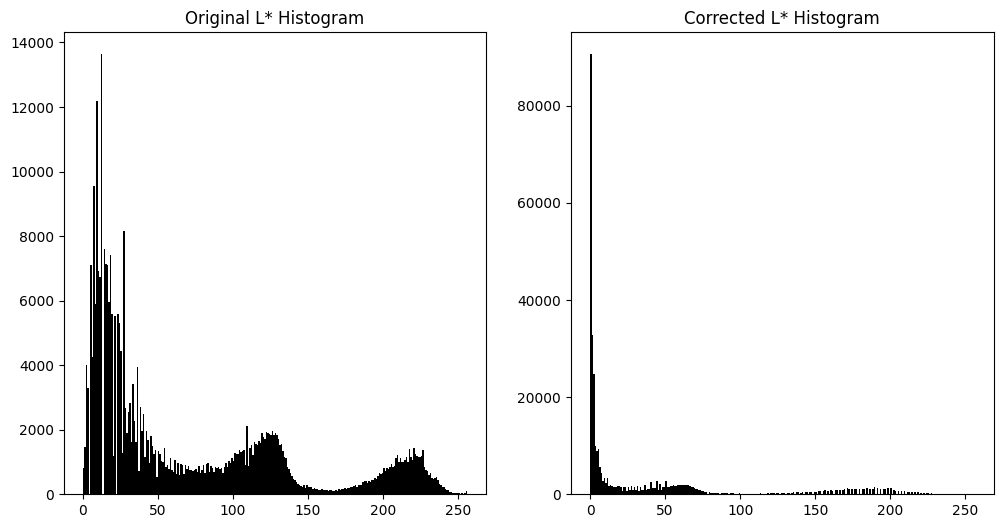

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('a1images\\highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
lab_image = cv.cvtColor(image, cv.COLOR_BGR2Lab)

# Split the L*, a*, and b* channels
L, a, b = cv.split(lab_image)

# Apply gamma correction to the L* channel
gamma = 2  # Change this value for different gamma corrections
L_float = L / 255.0  # Normalize to range 0-1
L_corrected = np.power(L_float, gamma) * 255.0  # Apply gamma correction and scale back to 0-255
L_corrected = np.uint8(np.clip(L_corrected, 0, 255))

# Merge the corrected L* channel back with a* and b* channels
lab_corrected = cv.merge([L_corrected, a, b])

# Convert the corrected L*a*b* image back to RGB for display
corrected_image = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)

# Plot the original and gamma-corrected images side by side
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB)), plt.title('Gamma Corrected Image')
plt.show()

# Plot the histograms of the original and corrected L* channels
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.hist(L.flatten(), bins=256, range=(0, 256), color='black'), plt.title('Original L* Histogram')
plt.subplot(122), plt.hist(L_corrected.flatten(), bins=256, range=(0, 256), color='black'), plt.title('Corrected L* Histogram')
plt.show()


# Used Gamma Value = 2